# Чтение данных

In [354]:
import pandas as pd
from sklearn.utils import resample
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

# Функции препроцессинга (объявляем несколько вариантов, вызываем через одну общую функцию)

In [355]:
#функция для разбиения возрастов по группам согласно гипотезе, приведенной в файле.
#group_size - параметр размера каждой группы
#результаты нужно обязательно подвергуть one-hot encoding, так как зависимость нелинейная
def get_age_group(age):
    group_size = 7
    if age <= 17:
        return 1
    if age > 66:
        age = 66
    return 1 + ((age - 17) // group_size)
print(get_age_group(18), get_age_group(27), get_age_group(45), get_age_group(60), get_age_group(80))

1 2 5 7 8


In [356]:
df['target'].value_counts()

0    21925
1     2787
Name: target, dtype: int64

In [372]:
#Cut all unsignificant, define groups where applicable
def preprocessing_1(df):
    
    df["age_group"] = df["age"].map(get_age_group)
    df['pdays'] = df['pdays'].map(lambda x: 0 if x == 999 else 1)
    
    df = df.drop(["_id", "age", "marital", "education", "default", 
                  "housing", "loan", "day_of_week", "cons.price.idx", 
                  "cons.conf.idx", "euribor3m"], axis = 1)
    
    
    df = pd.get_dummies(df, columns=['age_group', 'job', 'contact', 'month', 'poutcome'])
    return df

# для обработки через Catboost оставил больше категориальных фич
def preprocessing_2(df):
    
    df["age_group"] = df["age"].map(get_age_group)
    df['pdays'] = df['pdays'].map(lambda x: 0 if x == 999 else 1)
    
    df = df.drop(["_id", "age", "education", "default", 
                  "housing",  "cons.price.idx", 
                  "cons.conf.idx", "euribor3m"], axis = 1)
    
    
    df = pd.get_dummies(df, columns=['age_group', 'job', 'contact', 'month', 'poutcome',"marital","day_of_week", "loan"])
    return df

# вместе с балансировкой классов
def preprocessing_3(df):
    
    df["age_group"] = df["age"].map(get_age_group)
    df['pdays'] = df['pdays'].map(lambda x: 0 if x == 999 else 1)
    
    df = df.drop(["_id", "age", "marital", "education", "default", 
                  "housing", "loan", "day_of_week", "cons.price.idx", 
                  "cons.conf.idx", "euribor3m"], axis = 1)
    
    
    df = pd.get_dummies(df, columns=['age_group', 'job', 'contact', 
                                     'month', 'poutcome'])
    df_majority = df[df.target == 0]
    df_minority = df[df.target == 1]
    df_minority_upsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=2787,    # to match majority class
                                 random_state=42) 
    df_ = pd.concat([df_minority, df_minority_upsampled])
    
    return df_

#Объявим функцию для обработки, внутри которой будем вызывать один из вариантов обработки, которые опишем выше
def preprocessing(df_input, algorithm = preprocessing_3):
    return algorithm(df_input)

preprocessing(df).head(5)

,duration,campaign,pdays,previous,emp.var.rate,nr.employed,target,age_group_1,age_group_2,age_group_3,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
8,585,1,1,3,-1.1,4963.6,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
36,449,2,1,0,-1.7,4991.6,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
41,591,2,1,0,-2.9,5076.2,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
48,716,2,1,0,1.4,5228.1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
50,170,3,1,0,-1.8,5099.1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 23 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
age_group   

In [373]:
from sklearn.preprocessing import StandardScaler
#обрабатываем данные инициализируем X и Y
df_prepared = preprocessing(df)
Y = df_prepared['target']
X = StandardScaler().fit_transform(df_prepared.drop('target', axis=1))
#X = df_prepared.drop('target', axis=1)

In [374]:
Y.shape

(5574,)

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, random_state=12134)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5016, 41) (558, 41) (5016,) (558,)


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Тренировка модели

# Логистическая регрессия

In [376]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

0.9189255983350677

# Дерево принятия решений

In [377]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:,1])

0.9144640998959417

# Случайный лес

In [378]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth = 8)
random_forest.fit(X_train, y_train)
roc_auc_score(y_test, random_forest.predict_proba(X_test)[:,1])

0.9220018210197711

(-0.01, 1.01)

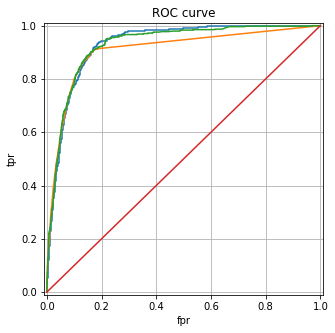

In [86]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, decision_tree.predict_proba(x_test)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, random_forest.predict_proba(x_test)[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

# Оценка точности модели

In [319]:
#валидация
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=42)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("Средняя точность на 10 фолдах: %.3f" % (results.mean()))

Средняя точность на 10 фолдах: 0.863


Ниже видно, что recall низкий. Это из за дисбаланса классов

In [379]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.73      0.82       248
          1       0.82      0.95      0.88       310

avg / total       0.87      0.85      0.85       558



In [380]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'plt' is not defined

Площадь под кривой 0.87. Модель возвращает 87% true positive результатов из всех возможных.

In [381]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[181  67]
 [ 14 296]]


# Тренировка модели. Решающие деревья.

In [283]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [284]:
param_grid = {
    'criterion': ['gini'],
    'n_estimators': [2500, 3000],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'bootstrap':[True, False]
}

In [285]:
cv =  StratifiedKFold(n_splits = 2, random_state = 42, shuffle = True)

In [286]:
model = RandomForestClassifier(random_state = 42)

In [287]:
random_search = RandomizedSearchCV(model,param_distributions = param_grid, n_jobs = -1, cv = cv,
                                  random_state = 42, n_iter = 5)

In [288]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'criterion': ['gini'], 'n_estimators': [2500, 3000], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [289]:
random_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 2500}

In [290]:
random_search.best_score_

0.8752374920835972

In [291]:
# Predicting the Test set results
y_pred = random_search.predict(X_test)

In [292]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.82      0.87       387
          1       0.86      0.95      0.90       450

avg / total       0.90      0.89      0.89       837



In [293]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[318  69]
 [ 22 428]]


In [155]:
# Predicting the Test set results
y_pred = random_search.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4254  150]
 [ 264  275]]


In [42]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

In [169]:
df_prepared.drop(['target'], inplace = True, axis = 1)

In [170]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43850 entries, 0 to 20740
Data columns (total 53 columns):
duration                43850 non-null int64
campaign                43850 non-null int64
pdays                   43850 non-null int64
previous                43850 non-null int64
emp.var.rate            43850 non-null float64
nr.employed             43850 non-null float64
age_group_1             43850 non-null uint8
age_group_2             43850 non-null uint8
age_group_3             43850 non-null uint8
age_group_4             43850 non-null uint8
age_group_5             43850 non-null uint8
age_group_6             43850 non-null uint8
age_group_7             43850 non-null uint8
age_group_8             43850 non-null uint8
job_admin.              43850 non-null uint8
job_blue-collar         43850 non-null uint8
job_entrepreneur        43850 non-null uint8
job_housemaid           43850 non-null uint8
job_management          43850 non-null uint8
job_retired             43850 no

In [171]:
feature_importances = pd.DataFrame(model2.feature_importances_,
                                   index = df_prepared.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [173]:
feature_importances

,importance
duration,0.418454
nr.employed,0.105487
emp.var.rate,0.077005
campaign,0.042763
poutcome_success,0.021833
month_may,0.018996
contact_telephone,0.013703
contact_cellular,0.013700
previous,0.013593
month_oct,0.010775


# Запилим Catboost

In [382]:
from catboost import CatBoostClassifier as cbl

In [383]:
classifier = cbl( )

In [370]:
params = {
    'iterations': [200, 300, 500, 600, 2000],
    'learning_rate' :[0.1, 0.01, 0.5,],
    #'scale_pos_weight':([200,50])
    'depth':[4,6,8,10],
}

In [332]:
random_search = RandomizedSearchCV(classifier,param_distributions = params, n_jobs = -1, cv = cv,
                                  random_state = 42, n_iter = 5)

In [333]:
random_search.fit(X_train, y_train,
                 eval_set=(X_test, y_test))

JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
D:\ProgramData\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
D:\ProgramData\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x000001F96FD36F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001F96FD36F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'random_search.fit(X_train, y_train,\n                 eval_set=(X_test, y_test))', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 21, 11, 52, 16, 841700, tzinfo=tzutc()), 'msg_id': '9e8f67367f60421eadb07bd4d8c35a86', 'msg_type': 'execute_request', 'session': '33b0325047b245e79378832e10000d97', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '9e8f67367f60421eadb07bd4d8c35a86', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'33b0325047b245e79378832e10000d97']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'random_search.fit(X_train, y_train,\n                 eval_set=(X_test, y_test))', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 21, 11, 52, 16, 841700, tzinfo=tzutc()), 'msg_id': '9e8f67367f60421eadb07bd4d8c35a86', 'msg_type': 'execute_request', 'session': '33b0325047b245e79378832e10000d97', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '9e8f67367f60421eadb07bd4d8c35a86', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'33b0325047b245e79378832e10000d97'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'random_search.fit(X_train, y_train,\n                 eval_set=(X_test, y_test))', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 21, 11, 52, 16, 841700, tzinfo=tzutc()), 'msg_id': '9e8f67367f60421eadb07bd4d8c35a86', 'msg_type': 'execute_request', 'session': '33b0325047b245e79378832e10000d97', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '9e8f67367f60421eadb07bd4d8c35a86', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='random_search.fit(X_train, y_train,\n                 eval_set=(X_test, y_test))', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'random_search.fit(X_train, y_train,\n                 eval_set=(X_test, y_test))'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('random_search.fit(X_train, y_train,\n                 eval_set=(X_test, y_test))',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('random_search.fit(X_train, y_train,\n                 eval_set=(X_test, y_test))',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='random_search.fit(X_train, y_train,\n                 eval_set=(X_test, y_test))', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-333-2df3e78386c1>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1f90123ca20, executio..._before_exec=None error_in_exec=None result=None>)
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])
   2855                 code = compiler(mod, cell_name, "single")
-> 2856                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001F978209660, file "<ipython-input-333-2df3e78386c1>", line 1>
        result = <ExecutionResult object at 1f90123ca20, executio..._before_exec=None error_in_exec=None result=None>
   2857                     return True
   2858 
   2859             # Flush softspace
   2860             if softspace(sys.stdout, 0):

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001F978209660, file "<ipython-input-333-2df3e78386c1>", line 1>, result=<ExecutionResult object at 1f90123ca20, executio..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001F978209660, file "<ipython-input-333-2df3e78386c1>", line 1>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\nfrom sklearn.utils import resample\ndf = pd.read_csv('train.csv')\ndf.info()", '#функция для разбиения возрастов по группам согл..._group(45), get_age_group(60), get_age_group(80))', '#Cut all unsignificant, define groups where appl...rn algorithm(df_input)\n\npreprocessing(df).head(5)', '#Cut all unsignificant, define groups where appl...rn algorithm(df_input)\n\npreprocessing(df).head(5)', '#Cut all unsignificant, define groups where appl...rn algorithm(df_input)\n\npreprocessing(df).head(5)', "from sklearn.preprocessing import StandardScaler...fit_transform(df_prepared.drop('target', axis=1))", 'Y.shape', 'from sklearn.model_selection import train_test_s...shape, X_test.shape, y_train.shape, y_test.shape)', 'from catboost import CatBoostClassifier as cbl', 'cbl = cbl()', "params = {\n    'loss_function': ['CrossEntropy',...0, 3000],\n    'learning_rate' :[0.1, 0.01, 0.5]\n}", 'random_search = RandomizedSearchCV(cbl,param_dis...                   random_state = 42, n_iter = 5)', 'from sklearn.ensemble import RandomForestClassif...sklearn.model_selection import RandomizedSearchCV', "params = {\n    'loss_function': ['CrossEntropy',...0, 3000],\n    'learning_rate' :[0.1, 0.01, 0.5]\n}", 'random_search = RandomizedSearchCV(cbl,param_dis...                   random_state = 42, n_iter = 5)', 'cv =  StratifiedKFold(n_splits = 2, random_state = 42, shuffle = True)', 'random_search = RandomizedSearchCV(cbl,param_dis...                   random_state = 42, n_iter = 5)', 'random_search.fit(X_train, y_train)', "params = {\n    'loss_function': ['CrossEntropy',...0, 3000],\n    'learning_rate' :[0.1, 0.01, 0.5]\n}", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5:    duration  campaign  pdays  previous  emp.var....             0         0  

[5 rows x 54 columns], 7: (24712,), 23: RandomizedSearchCV(cv=StratifiedKFold(n_splits=2...turn_train_score='warn', scoring=None, verbose=0), 26: {'iterations': 200, 'learning_rate': 0.1}, 27: 0.9155748899792605, 37: <catboost.core.CatBoostClassifier object>, 100: <catboost.core.CatBoostClassifier object>, 104: <catboost.core.CatBoostClassifier object>, 112: <catboost.core.CatBoostClassifier object>, 117: <catboost.core.CatBoostClassifier object>, ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import pandas as pd\nfrom sklearn.utils import resample\ndf = pd.read_csv('train.csv')\ndf.info()", '#функция для разбиения возрастов по группам согл..._group(45), get_age_group(60), get_age_group(80))', '#Cut all unsignificant, define groups where appl...rn algorithm(df_input)\n\npreprocessing(df).head(5)', '#Cut all unsignificant, define groups where appl...rn algorithm(df_input)\n\npreprocessing(df).head(5)', '#Cut all unsignificant, define groups where appl...rn algorithm(df_input)\n\npreprocessing(df).head(5)', "from sklearn.preprocessing import StandardScaler...fit_transform(df_prepared.drop('target', axis=1))", 'Y.shape', 'from sklearn.model_selection import train_test_s...shape, X_test.shape, y_train.shape, y_test.shape)', 'from catboost import CatBoostClassifier as cbl', 'cbl = cbl()', "params = {\n    'loss_function': ['CrossEntropy',...0, 3000],\n    'learning_rate' :[0.1, 0.01, 0.5]\n}", 'random_search = RandomizedSearchCV(cbl,param_dis...                   random_state = 42, n_iter = 5)', 'from sklearn.ensemble import RandomForestClassif...sklearn.model_selection import RandomizedSearchCV', "params = {\n    'loss_function': ['CrossEntropy',...0, 3000],\n    'learning_rate' :[0.1, 0.01, 0.5]\n}", 'random_search = RandomizedSearchCV(cbl,param_dis...                   random_state = 42, n_iter = 5)', 'cv =  StratifiedKFold(n_splits = 2, random_state = 42, shuffle = True)', 'random_search = RandomizedSearchCV(cbl,param_dis...                   random_state = 42, n_iter = 5)', 'random_search.fit(X_train, y_train)', "params = {\n    'loss_function': ['CrossEntropy',...0, 3000],\n    'learning_rate' :[0.1, 0.01, 0.5]\n}", ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5:    duration  campaign  pdays  previous  emp.var....             0         0  

[5 rows x 54 columns], 7: (24712,), 23: RandomizedSearchCV(cv=StratifiedKFold(n_splits=2...turn_train_score='warn', scoring=None, verbose=0), 26: {'iterations': 200, 'learning_rate': 0.1}, 27: 0.9155748899792605, 37: <catboost.core.CatBoostClassifier object>, 100: <catboost.core.CatBoostClassifier object>, 104: <catboost.core.CatBoostClassifier object>, 112: <catboost.core.CatBoostClassifier object>, 117: <catboost.core.CatBoostClassifier object>, ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
D:\users\AVNikolaev\Google Диск\00 Data_sciense\Skillfactory\Lesson4_Classification\hw4\Новая папка\sfml_team2_hw4\<ipython-input-333-2df3e78386c1> in <module>()
      1 random_search.fit(X_train, y_train,
----> 2                  eval_set=(X_test, y_test))

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=RandomizedSearchCV(cv=StratifiedKFold(n_splits=2...turn_train_score='warn', scoring=None, verbose=0), X=       duration  campaign  pdays  previous  emp....  1                 0  

[4737 rows x 41 columns], y=15835    0
4884     0
3081     0
11764    0
2407...9      1
Name: target, Length: 4737, dtype: int64, groups=None, **fit_params={'eval_set': (       duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 539      0
9890     1
18406    1
11003    0
2173...97      1
Name: target, Length: 837, dtype: int64)})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of StratifiedKFold(n_splits=2, random_state=42, shuffle=True)>
        X =        duration  campaign  pdays  previous  emp....  1                 0  

[4737 rows x 41 columns]
        y = 15835    0
4884     0
3081     0
11764    0
2407...9      1
Name: target, Length: 4737, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Sat Jul 21 14:52:19 2018
PID: 12444                Python 3.6.4: D:\ProgramData\Anaconda3\python.exe
...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (<catboost.core.CatBoostClassifier object>,        duration  campaign  pdays  previous  emp....  1                 0  

[4737 rows x 41 columns], 15835    0
4884     0
3081     0
11764    0
2407...9      1
Name: target, Length: 4737, dtype: int64, {'score': <function _passthrough_scorer>}, array([   0,    1,    3, ..., 4730, 4735, 4736]), array([   2,    8,   10, ..., 4732, 4733, 4734]), 0, {'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5}), {'error_score': 'raise', 'fit_params': {'eval_set': (       duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 539      0
9890     1
18406    1
11003    0
2173...97      1
Name: target, Length: 837, dtype: int64)}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (<catboost.core.CatBoostClassifier object>,        duration  campaign  pdays  previous  emp....  1                 0  

[4737 rows x 41 columns], 15835    0
4884     0
3081     0
11764    0
2407...9      1
Name: target, Length: 4737, dtype: int64, {'score': <function _passthrough_scorer>}, array([   0,    1,    3, ..., 4730, 4735, 4736]), array([   2,    8,   10, ..., 4732, 4733, 4734]), 0, {'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5})
        kwargs = {'error_score': 'raise', 'fit_params': {'eval_set': (       duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 539      0
9890     1
18406    1
11003    0
2173...97      1
Name: target, Length: 837, dtype: int64)}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=<catboost.core.CatBoostClassifier object>, X=       duration  campaign  pdays  previous  emp....  1                 0  

[4737 rows x 41 columns], y=15835    0
4884     0
3081     0
11764    0
2407...9      1
Name: target, Length: 4737, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([   0,    1,    3, ..., 4730, 4735, 4736]), test=array([   2,    8,   10, ..., 4732, 4733, 4734]), verbose=0, parameters={'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5}, fit_params={'eval_set': (       duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 539      0
9890     1
18406    1
11003    0
2173...97      1
Name: target, Length: 837, dtype: int64)}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method CatBoostClassifier.fit of <catboost.core.CatBoostClassifier object>>
        X_train =        duration  campaign  pdays  previous  emp....  1                 0  

[2368 rows x 41 columns]
        y_train = 15835    0
4884     0
11764    0
24079    1
6270...9      1
Name: target, Length: 2368, dtype: int64
        fit_params = {'eval_set': (       duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 539      0
9890     1
18406    1
11003    0
2173...97      1
Name: target, Length: 837, dtype: int64)}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py in fit(self=<catboost.core.CatBoostClassifier object>, X=       duration  campaign  pdays  previous  emp....  1                 0  

[2368 rows x 41 columns], y=15835    0
4884     0
11764    0
24079    1
6270...9      1
Name: target, Length: 2368, dtype: int64, cat_features=None, sample_weight=None, baseline=None, use_best_model=None, eval_set=(       duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 539      0
9890     1
18406    1
11003    0
2173...97      1
Name: target, Length: 837, dtype: int64), verbose=None, logging_level=None, plot=False, column_description=None, verbose_eval=None)
   1679 
   1680         Returns
   1681         -------
   1682         model : CatBoost
   1683         """
-> 1684         self._fit(X, y, cat_features, None, sample_weight, None, None, None, baseline, use_best_model, eval_set, verbose, logging_level, plot, column_description, verbose_eval)
        self._fit = <bound method CatBoost._fit of <catboost.core.CatBoostClassifier object>>
        X =        duration  campaign  pdays  previous  emp....  1                 0  

[2368 rows x 41 columns]
        y = 15835    0
4884     0
11764    0
24079    1
6270...9      1
Name: target, Length: 2368, dtype: int64
        cat_features = None
        sample_weight = None
        baseline = None
        use_best_model = None
        eval_set = (       duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 539      0
9890     1
18406    1
11003    0
2173...97      1
Name: target, Length: 837, dtype: int64)
        verbose = None
        logging_level = None
        plot = False
        column_description = None
        verbose_eval = None
   1685         return self
   1686 
   1687     def predict(self, data, prediction_type='Class', ntree_start=0, ntree_end=0, thread_count=-1, verbose=None):
   1688         """

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py in _fit(self=<catboost.core.CatBoostClassifier object>, X=       duration  campaign  pdays  previous  emp....  1                 0  

[2368 rows x 41 columns], y=15835    0
4884     0
11764    0
24079    1
6270...9      1
Name: target, Length: 2368, dtype: int64, cat_features=None, pairs=None, sample_weight=None, group_id=None, subgroup_id=None, pairs_weight=None, baseline=None, use_best_model=None, eval_set=<catboost.core.Pool object>, verbose=None, logging_level=None, plot=False, column_description=None, verbose_eval=None)
    781         if plot:
    782             widget = _get_catboost_widget(_get_train_dir(self.get_params()))
    783             widget._run_update()
    784 
    785         with log_fixup():
--> 786             self._train(train_pool, eval_set, params, allow_clear_pool)
        self._train = <bound method _CatBoostBase._train of <catboost.core.CatBoostClassifier object>>
        train_pool = <catboost.core.Pool object>
        eval_set = <catboost.core.Pool object>
        params = {'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5, 'loss_function': 'Logloss'}
        allow_clear_pool = True
    787         if calc_feature_importance:
    788             if allow_clear_pool:
    789                 train_pool = _build_train_pool(X, y, cat_features, pairs, sample_weight, group_id, subgroup_id, pairs_weight, baseline, column_description)
    790             setattr(self, "_feature_importance", self.get_feature_importance(train_pool))

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._CatBoostBase._train()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._CatBoost._train()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._CatBoost._train()

...........................................................................
D:\ProgramData\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._PreprocessParams.__init__()

...........................................................................
D:\ProgramData\Anaconda3\lib\json\__init__.py in dumps(obj={'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5, 'loss_function': 'Logloss'}, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw={})
    226     # cached encoder
    227     if (not skipkeys and ensure_ascii and
    228         check_circular and allow_nan and
    229         cls is None and indent is None and separators is None and
    230         default is None and not sort_keys and not kw):
--> 231         return _default_encoder.encode(obj)
        obj = {'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5, 'loss_function': 'Logloss'}
    232     if cls is None:
    233         cls = JSONEncoder
    234     return cls(
    235         skipkeys=skipkeys, ensure_ascii=ensure_ascii,

...........................................................................
D:\ProgramData\Anaconda3\lib\json\encoder.py in encode(self=<json.encoder.JSONEncoder object>, o={'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5, 'loss_function': 'Logloss'})
    194             else:
    195                 return encode_basestring(o)
    196         # This doesn't pass the iterator directly to ''.join() because the
    197         # exceptions aren't as detailed.  The list call should be roughly
    198         # equivalent to the PySequence_Fast that ''.join() would do.
--> 199         chunks = self.iterencode(o, _one_shot=True)
        chunks = undefined
        self.iterencode = <bound method JSONEncoder.iterencode of <json.encoder.JSONEncoder object>>
        o = {'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5, 'loss_function': 'Logloss'}
    200         if not isinstance(chunks, (list, tuple)):
    201             chunks = list(chunks)
    202         return ''.join(chunks)
    203 

...........................................................................
D:\ProgramData\Anaconda3\lib\json\encoder.py in iterencode(self=<json.encoder.JSONEncoder object>, o={'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5, 'loss_function': 'Logloss'}, _one_shot=True)
    252         else:
    253             _iterencode = _make_iterencode(
    254                 markers, self.default, _encoder, self.indent, floatstr,
    255                 self.key_separator, self.item_separator, self.sort_keys,
    256                 self.skipkeys, _one_shot)
--> 257         return _iterencode(o, 0)
        _iterencode = <_json.Encoder object>
        o = {'depth': 6, 'eval_set':        duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns], 'iterations': 2000, 'learning_rate': 0.5, 'loss_function': 'Logloss'}
    258 
    259 def _make_iterencode(markers, _default, _encoder, _indent, _floatstr,
    260         _key_separator, _item_separator, _sort_keys, _skipkeys, _one_shot,
    261         ## HACK: hand-optimized bytecode; turn globals into locals

...........................................................................
D:\ProgramData\Anaconda3\lib\json\encoder.py in default(self=<json.encoder.JSONEncoder object>, o=       duration  campaign  pdays  previous  emp....   1                 0  

[837 rows x 41 columns])
    175                 # Let the base class default method raise the TypeError
    176                 return JSONEncoder.default(self, o)
    177 
    178         """
    179         raise TypeError("Object of type '%s' is not JSON serializable" %
--> 180                         o.__class__.__name__)
        o.__class__.__name__ = 'DataFrame'
    181 
    182     def encode(self, o):
    183         """Return a JSON string representation of a Python data structure.
    184 

TypeError: Object of type 'DataFrame' is not JSON serializable
___________________________________________________________________________

In [326]:
random_search.best_params_

{'depth': 10, 'iterations': 200, 'learning_rate': 0.1}

In [367]:
random_search.best_score_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [384]:
cbl_final = cbl(iterations = 1500, learning_rate = 0.05,
    depth=10, use_best_model = True)

In [385]:
cbl_final.fit(X_train,y_train,eval_set=(X_test, y_test))

0:	learn: 0.6404353	test: 0.6455475	best: 0.6455475 (0)	total: 127ms	remaining: 3m 9s
1:	learn: 0.5989328	test: 0.6088659	best: 0.6088659 (1)	total: 226ms	remaining: 2m 48s
2:	learn: 0.5597942	test: 0.5741594	best: 0.5741594 (2)	total: 325ms	remaining: 2m 42s
3:	learn: 0.5272959	test: 0.5446325	best: 0.5446325 (3)	total: 442ms	remaining: 2m 45s
4:	learn: 0.5012173	test: 0.5214451	best: 0.5214451 (4)	total: 470ms	remaining: 2m 20s
5:	learn: 0.4782667	test: 0.5005183	best: 0.5005183 (5)	total: 573ms	remaining: 2m 22s
6:	learn: 0.4625000	test: 0.4854913	best: 0.4854913 (6)	total: 594ms	remaining: 2m 6s
7:	learn: 0.4430090	test: 0.4679538	best: 0.4679538 (7)	total: 700ms	remaining: 2m 10s
8:	learn: 0.4264564	test: 0.4527312	best: 0.4527312 (8)	total: 726ms	remaining: 2m
9:	learn: 0.4107408	test: 0.4381115	best: 0.4381115 (9)	total: 826ms	remaining: 2m 3s
10:	learn: 0.3990024	test: 0.4274383	best: 0.4274383 (10)	total: 882ms	remaining: 1m 59s
11:	learn: 0.3910702	test: 0.4198723	best: 0.419

94:	learn: 0.2505775	test: 0.3061137	best: 0.3061137 (94)	total: 6.92s	remaining: 1m 42s
95:	learn: 0.2501439	test: 0.3059287	best: 0.3059287 (95)	total: 7.06s	remaining: 1m 43s
96:	learn: 0.2498506	test: 0.3056312	best: 0.3056312 (96)	total: 7.12s	remaining: 1m 42s
97:	learn: 0.2497907	test: 0.3058018	best: 0.3056312 (96)	total: 7.14s	remaining: 1m 42s
98:	learn: 0.2495468	test: 0.3058587	best: 0.3056312 (96)	total: 7.18s	remaining: 1m 41s
99:	learn: 0.2491626	test: 0.3057897	best: 0.3056312 (96)	total: 7.22s	remaining: 1m 41s
100:	learn: 0.2487758	test: 0.3053612	best: 0.3053612 (100)	total: 7.32s	remaining: 1m 41s
101:	learn: 0.2483248	test: 0.3049599	best: 0.3049599 (101)	total: 7.36s	remaining: 1m 40s
102:	learn: 0.2481314	test: 0.3047956	best: 0.3047956 (102)	total: 7.39s	remaining: 1m 40s
103:	learn: 0.2480453	test: 0.3046044	best: 0.3046044 (103)	total: 7.42s	remaining: 1m 39s
104:	learn: 0.2476267	test: 0.3041336	best: 0.3041336 (104)	total: 7.53s	remaining: 1m 39s
105:	learn:

186:	learn: 0.2141278	test: 0.2982530	best: 0.2979101 (164)	total: 16.8s	remaining: 1m 57s
187:	learn: 0.2135712	test: 0.2987581	best: 0.2979101 (164)	total: 17s	remaining: 1m 58s
188:	learn: 0.2134694	test: 0.2987739	best: 0.2979101 (164)	total: 17s	remaining: 1m 57s
189:	learn: 0.2129067	test: 0.2985817	best: 0.2979101 (164)	total: 17.1s	remaining: 1m 58s
190:	learn: 0.2125300	test: 0.2987827	best: 0.2979101 (164)	total: 17.2s	remaining: 1m 58s
191:	learn: 0.2122527	test: 0.2989829	best: 0.2979101 (164)	total: 17.4s	remaining: 1m 58s
192:	learn: 0.2117332	test: 0.2986055	best: 0.2979101 (164)	total: 17.6s	remaining: 1m 58s
193:	learn: 0.2115106	test: 0.2987829	best: 0.2979101 (164)	total: 17.7s	remaining: 1m 59s
194:	learn: 0.2111975	test: 0.2987480	best: 0.2979101 (164)	total: 17.9s	remaining: 1m 59s
195:	learn: 0.2109430	test: 0.2985342	best: 0.2979101 (164)	total: 18s	remaining: 1m 59s
196:	learn: 0.2104895	test: 0.2985066	best: 0.2979101 (164)	total: 18.1s	remaining: 1m 59s
197:	

279:	learn: 0.1801382	test: 0.3021623	best: 0.2979101 (164)	total: 27.1s	remaining: 1m 57s
280:	learn: 0.1797438	test: 0.3020915	best: 0.2979101 (164)	total: 27.2s	remaining: 1m 57s
281:	learn: 0.1794969	test: 0.3020218	best: 0.2979101 (164)	total: 27.3s	remaining: 1m 57s
282:	learn: 0.1793188	test: 0.3020196	best: 0.2979101 (164)	total: 27.4s	remaining: 1m 57s
283:	learn: 0.1789136	test: 0.3020103	best: 0.2979101 (164)	total: 27.5s	remaining: 1m 57s
284:	learn: 0.1786584	test: 0.3019926	best: 0.2979101 (164)	total: 27.6s	remaining: 1m 57s
285:	learn: 0.1782679	test: 0.3022287	best: 0.2979101 (164)	total: 27.7s	remaining: 1m 57s
286:	learn: 0.1779272	test: 0.3023572	best: 0.2979101 (164)	total: 27.8s	remaining: 1m 57s
287:	learn: 0.1777583	test: 0.3021636	best: 0.2979101 (164)	total: 27.9s	remaining: 1m 57s
288:	learn: 0.1774293	test: 0.3022900	best: 0.2979101 (164)	total: 28s	remaining: 1m 57s
289:	learn: 0.1769738	test: 0.3028855	best: 0.2979101 (164)	total: 28.1s	remaining: 1m 57s
2

370:	learn: 0.1570363	test: 0.3074841	best: 0.2979101 (164)	total: 36.9s	remaining: 1m 52s
371:	learn: 0.1568090	test: 0.3076011	best: 0.2979101 (164)	total: 37s	remaining: 1m 52s
372:	learn: 0.1564830	test: 0.3076801	best: 0.2979101 (164)	total: 37.1s	remaining: 1m 52s
373:	learn: 0.1561971	test: 0.3080062	best: 0.2979101 (164)	total: 37.2s	remaining: 1m 52s
374:	learn: 0.1559736	test: 0.3080943	best: 0.2979101 (164)	total: 37.3s	remaining: 1m 51s
375:	learn: 0.1558880	test: 0.3082924	best: 0.2979101 (164)	total: 37.4s	remaining: 1m 51s
376:	learn: 0.1556740	test: 0.3081262	best: 0.2979101 (164)	total: 37.5s	remaining: 1m 51s
377:	learn: 0.1555236	test: 0.3081984	best: 0.2979101 (164)	total: 37.6s	remaining: 1m 51s
378:	learn: 0.1552637	test: 0.3082949	best: 0.2979101 (164)	total: 37.7s	remaining: 1m 51s
379:	learn: 0.1550116	test: 0.3082959	best: 0.2979101 (164)	total: 37.8s	remaining: 1m 51s
380:	learn: 0.1548093	test: 0.3082720	best: 0.2979101 (164)	total: 37.9s	remaining: 1m 51s
3

462:	learn: 0.1396664	test: 0.3149442	best: 0.2979101 (164)	total: 46.3s	remaining: 1m 43s
463:	learn: 0.1395148	test: 0.3148919	best: 0.2979101 (164)	total: 46.5s	remaining: 1m 43s
464:	learn: 0.1393020	test: 0.3148080	best: 0.2979101 (164)	total: 46.6s	remaining: 1m 43s
465:	learn: 0.1390879	test: 0.3150425	best: 0.2979101 (164)	total: 46.7s	remaining: 1m 43s
466:	learn: 0.1389180	test: 0.3150993	best: 0.2979101 (164)	total: 46.8s	remaining: 1m 43s
467:	learn: 0.1384565	test: 0.3153052	best: 0.2979101 (164)	total: 47s	remaining: 1m 43s
468:	learn: 0.1383311	test: 0.3152355	best: 0.2979101 (164)	total: 47.1s	remaining: 1m 43s
469:	learn: 0.1381630	test: 0.3153865	best: 0.2979101 (164)	total: 47.2s	remaining: 1m 43s
470:	learn: 0.1379873	test: 0.3151688	best: 0.2979101 (164)	total: 47.3s	remaining: 1m 43s
471:	learn: 0.1378425	test: 0.3154109	best: 0.2979101 (164)	total: 47.4s	remaining: 1m 43s
472:	learn: 0.1377725	test: 0.3155148	best: 0.2979101 (164)	total: 47.5s	remaining: 1m 43s
4

554:	learn: 0.1220933	test: 0.3241038	best: 0.2979101 (164)	total: 56.5s	remaining: 1m 36s
555:	learn: 0.1220005	test: 0.3241783	best: 0.2979101 (164)	total: 56.7s	remaining: 1m 36s
556:	learn: 0.1219264	test: 0.3240824	best: 0.2979101 (164)	total: 56.8s	remaining: 1m 36s
557:	learn: 0.1216886	test: 0.3237488	best: 0.2979101 (164)	total: 56.9s	remaining: 1m 36s
558:	learn: 0.1215058	test: 0.3238543	best: 0.2979101 (164)	total: 57s	remaining: 1m 35s
559:	learn: 0.1212234	test: 0.3239126	best: 0.2979101 (164)	total: 57.1s	remaining: 1m 35s
560:	learn: 0.1211133	test: 0.3238028	best: 0.2979101 (164)	total: 57.2s	remaining: 1m 35s
561:	learn: 0.1210357	test: 0.3238129	best: 0.2979101 (164)	total: 57.3s	remaining: 1m 35s
562:	learn: 0.1209381	test: 0.3239062	best: 0.2979101 (164)	total: 57.4s	remaining: 1m 35s
563:	learn: 0.1205986	test: 0.3239009	best: 0.2979101 (164)	total: 57.5s	remaining: 1m 35s
564:	learn: 0.1205043	test: 0.3240170	best: 0.2979101 (164)	total: 57.7s	remaining: 1m 35s
5

647:	learn: 0.1079501	test: 0.3310006	best: 0.2979101 (164)	total: 1m 6s	remaining: 1m 27s
648:	learn: 0.1078902	test: 0.3309671	best: 0.2979101 (164)	total: 1m 6s	remaining: 1m 27s
649:	learn: 0.1077115	test: 0.3309265	best: 0.2979101 (164)	total: 1m 6s	remaining: 1m 27s
650:	learn: 0.1075108	test: 0.3311051	best: 0.2979101 (164)	total: 1m 6s	remaining: 1m 27s
651:	learn: 0.1073791	test: 0.3311746	best: 0.2979101 (164)	total: 1m 6s	remaining: 1m 27s
652:	learn: 0.1072239	test: 0.3313773	best: 0.2979101 (164)	total: 1m 7s	remaining: 1m 26s
653:	learn: 0.1071602	test: 0.3313874	best: 0.2979101 (164)	total: 1m 7s	remaining: 1m 26s
654:	learn: 0.1071099	test: 0.3314146	best: 0.2979101 (164)	total: 1m 7s	remaining: 1m 26s
655:	learn: 0.1070482	test: 0.3315693	best: 0.2979101 (164)	total: 1m 7s	remaining: 1m 26s
656:	learn: 0.1067866	test: 0.3317474	best: 0.2979101 (164)	total: 1m 7s	remaining: 1m 26s
657:	learn: 0.1066778	test: 0.3318906	best: 0.2979101 (164)	total: 1m 7s	remaining: 1m 26s

738:	learn: 0.0978327	test: 0.3372419	best: 0.2979101 (164)	total: 1m 15s	remaining: 1m 17s
739:	learn: 0.0976259	test: 0.3373951	best: 0.2979101 (164)	total: 1m 15s	remaining: 1m 17s
740:	learn: 0.0975541	test: 0.3373974	best: 0.2979101 (164)	total: 1m 15s	remaining: 1m 17s
741:	learn: 0.0974981	test: 0.3373567	best: 0.2979101 (164)	total: 1m 15s	remaining: 1m 17s
742:	learn: 0.0974495	test: 0.3374288	best: 0.2979101 (164)	total: 1m 15s	remaining: 1m 17s
743:	learn: 0.0974072	test: 0.3373731	best: 0.2979101 (164)	total: 1m 16s	remaining: 1m 17s
744:	learn: 0.0973197	test: 0.3372175	best: 0.2979101 (164)	total: 1m 16s	remaining: 1m 17s
745:	learn: 0.0971996	test: 0.3373233	best: 0.2979101 (164)	total: 1m 16s	remaining: 1m 17s
746:	learn: 0.0971262	test: 0.3373088	best: 0.2979101 (164)	total: 1m 16s	remaining: 1m 16s
747:	learn: 0.0970602	test: 0.3373335	best: 0.2979101 (164)	total: 1m 16s	remaining: 1m 16s
748:	learn: 0.0970073	test: 0.3373792	best: 0.2979101 (164)	total: 1m 16s	remain

829:	learn: 0.0887729	test: 0.3437332	best: 0.2979101 (164)	total: 1m 24s	remaining: 1m 8s
830:	learn: 0.0886735	test: 0.3438939	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 8s
831:	learn: 0.0885763	test: 0.3440647	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 8s
832:	learn: 0.0885025	test: 0.3441340	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 8s
833:	learn: 0.0884343	test: 0.3439918	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 8s
834:	learn: 0.0883365	test: 0.3440207	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 8s
835:	learn: 0.0883207	test: 0.3440116	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 7s
836:	learn: 0.0882729	test: 0.3441690	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 7s
837:	learn: 0.0881856	test: 0.3441900	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 7s
838:	learn: 0.0881071	test: 0.3443358	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 7s
839:	learn: 0.0880619	test: 0.3444490	best: 0.2979101 (164)	total: 1m 25s	remaining: 1m 7s

921:	learn: 0.0798957	test: 0.3499413	best: 0.2979101 (164)	total: 1m 34s	remaining: 59.3s
922:	learn: 0.0798393	test: 0.3499615	best: 0.2979101 (164)	total: 1m 34s	remaining: 59.2s
923:	learn: 0.0796140	test: 0.3505026	best: 0.2979101 (164)	total: 1m 34s	remaining: 59.1s
924:	learn: 0.0795029	test: 0.3506948	best: 0.2979101 (164)	total: 1m 34s	remaining: 59s
925:	learn: 0.0794417	test: 0.3506711	best: 0.2979101 (164)	total: 1m 35s	remaining: 58.9s
926:	learn: 0.0794002	test: 0.3509101	best: 0.2979101 (164)	total: 1m 35s	remaining: 58.8s
927:	learn: 0.0793842	test: 0.3510135	best: 0.2979101 (164)	total: 1m 35s	remaining: 58.7s
928:	learn: 0.0791945	test: 0.3508411	best: 0.2979101 (164)	total: 1m 35s	remaining: 58.6s
929:	learn: 0.0791520	test: 0.3509060	best: 0.2979101 (164)	total: 1m 35s	remaining: 58.5s
930:	learn: 0.0790979	test: 0.3507698	best: 0.2979101 (164)	total: 1m 35s	remaining: 58.4s
931:	learn: 0.0789957	test: 0.3507214	best: 0.2979101 (164)	total: 1m 35s	remaining: 58.3s
9

1013:	learn: 0.0733087	test: 0.3555635	best: 0.2979101 (164)	total: 1m 44s	remaining: 50s
1014:	learn: 0.0732709	test: 0.3555981	best: 0.2979101 (164)	total: 1m 44s	remaining: 49.9s
1015:	learn: 0.0732226	test: 0.3559715	best: 0.2979101 (164)	total: 1m 44s	remaining: 49.7s
1016:	learn: 0.0731810	test: 0.3560538	best: 0.2979101 (164)	total: 1m 44s	remaining: 49.6s
1017:	learn: 0.0731465	test: 0.3561541	best: 0.2979101 (164)	total: 1m 44s	remaining: 49.5s
1018:	learn: 0.0729927	test: 0.3562812	best: 0.2979101 (164)	total: 1m 44s	remaining: 49.4s
1019:	learn: 0.0729564	test: 0.3563015	best: 0.2979101 (164)	total: 1m 44s	remaining: 49.3s
1020:	learn: 0.0729050	test: 0.3564066	best: 0.2979101 (164)	total: 1m 44s	remaining: 49.2s
1021:	learn: 0.0728484	test: 0.3563774	best: 0.2979101 (164)	total: 1m 45s	remaining: 49.1s
1022:	learn: 0.0727878	test: 0.3564234	best: 0.2979101 (164)	total: 1m 45s	remaining: 49s
1023:	learn: 0.0727722	test: 0.3564665	best: 0.2979101 (164)	total: 1m 45s	remaining

1103:	learn: 0.0680262	test: 0.3618265	best: 0.2979101 (164)	total: 1m 54s	remaining: 40.9s
1104:	learn: 0.0679617	test: 0.3622432	best: 0.2979101 (164)	total: 1m 54s	remaining: 40.8s
1105:	learn: 0.0679202	test: 0.3623403	best: 0.2979101 (164)	total: 1m 54s	remaining: 40.7s
1106:	learn: 0.0678877	test: 0.3623762	best: 0.2979101 (164)	total: 1m 54s	remaining: 40.6s
1107:	learn: 0.0678098	test: 0.3626167	best: 0.2979101 (164)	total: 1m 54s	remaining: 40.5s
1108:	learn: 0.0677966	test: 0.3625912	best: 0.2979101 (164)	total: 1m 54s	remaining: 40.4s
1109:	learn: 0.0677493	test: 0.3623987	best: 0.2979101 (164)	total: 1m 54s	remaining: 40.3s
1110:	learn: 0.0677252	test: 0.3625181	best: 0.2979101 (164)	total: 1m 54s	remaining: 40.3s
1111:	learn: 0.0676799	test: 0.3625487	best: 0.2979101 (164)	total: 1m 55s	remaining: 40.2s
1112:	learn: 0.0676444	test: 0.3627587	best: 0.2979101 (164)	total: 1m 55s	remaining: 40.1s
1113:	learn: 0.0676053	test: 0.3628348	best: 0.2979101 (164)	total: 1m 55s	remai

1194:	learn: 0.0631008	test: 0.3695799	best: 0.2979101 (164)	total: 2m 3s	remaining: 31.6s
1195:	learn: 0.0630318	test: 0.3697093	best: 0.2979101 (164)	total: 2m 3s	remaining: 31.4s
1196:	learn: 0.0629948	test: 0.3696531	best: 0.2979101 (164)	total: 2m 3s	remaining: 31.3s
1197:	learn: 0.0629639	test: 0.3697186	best: 0.2979101 (164)	total: 2m 3s	remaining: 31.2s
1198:	learn: 0.0629472	test: 0.3698547	best: 0.2979101 (164)	total: 2m 4s	remaining: 31.1s
1199:	learn: 0.0629364	test: 0.3698985	best: 0.2979101 (164)	total: 2m 4s	remaining: 31s
1200:	learn: 0.0628839	test: 0.3699912	best: 0.2979101 (164)	total: 2m 4s	remaining: 30.9s
1201:	learn: 0.0628391	test: 0.3698578	best: 0.2979101 (164)	total: 2m 4s	remaining: 30.8s
1202:	learn: 0.0627891	test: 0.3699501	best: 0.2979101 (164)	total: 2m 4s	remaining: 30.7s
1203:	learn: 0.0627232	test: 0.3698574	best: 0.2979101 (164)	total: 2m 4s	remaining: 30.6s
1204:	learn: 0.0625862	test: 0.3698650	best: 0.2979101 (164)	total: 2m 4s	remaining: 30.5s
1

1285:	learn: 0.0585269	test: 0.3751827	best: 0.2979101 (164)	total: 2m 13s	remaining: 22.1s
1286:	learn: 0.0585174	test: 0.3751618	best: 0.2979101 (164)	total: 2m 13s	remaining: 22s
1287:	learn: 0.0584971	test: 0.3751387	best: 0.2979101 (164)	total: 2m 13s	remaining: 21.9s
1288:	learn: 0.0584802	test: 0.3751877	best: 0.2979101 (164)	total: 2m 13s	remaining: 21.8s
1289:	learn: 0.0584519	test: 0.3751542	best: 0.2979101 (164)	total: 2m 13s	remaining: 21.7s
1290:	learn: 0.0584333	test: 0.3751001	best: 0.2979101 (164)	total: 2m 13s	remaining: 21.6s
1291:	learn: 0.0583790	test: 0.3751567	best: 0.2979101 (164)	total: 2m 13s	remaining: 21.5s
1292:	learn: 0.0583492	test: 0.3752277	best: 0.2979101 (164)	total: 2m 13s	remaining: 21.4s
1293:	learn: 0.0583238	test: 0.3752776	best: 0.2979101 (164)	total: 2m 13s	remaining: 21.3s
1294:	learn: 0.0582748	test: 0.3752967	best: 0.2979101 (164)	total: 2m 13s	remaining: 21.2s
1295:	learn: 0.0582170	test: 0.3754118	best: 0.2979101 (164)	total: 2m 14s	remaini

1376:	learn: 0.0547682	test: 0.3806308	best: 0.2979101 (164)	total: 2m 22s	remaining: 12.7s
1377:	learn: 0.0547538	test: 0.3805259	best: 0.2979101 (164)	total: 2m 22s	remaining: 12.6s
1378:	learn: 0.0547203	test: 0.3806360	best: 0.2979101 (164)	total: 2m 22s	remaining: 12.5s
1379:	learn: 0.0546995	test: 0.3808525	best: 0.2979101 (164)	total: 2m 22s	remaining: 12.4s
1380:	learn: 0.0546748	test: 0.3809899	best: 0.2979101 (164)	total: 2m 22s	remaining: 12.3s
1381:	learn: 0.0546518	test: 0.3810444	best: 0.2979101 (164)	total: 2m 22s	remaining: 12.2s
1382:	learn: 0.0545166	test: 0.3809868	best: 0.2979101 (164)	total: 2m 22s	remaining: 12.1s
1383:	learn: 0.0545092	test: 0.3809975	best: 0.2979101 (164)	total: 2m 23s	remaining: 12s
1384:	learn: 0.0544811	test: 0.3811348	best: 0.2979101 (164)	total: 2m 23s	remaining: 11.9s
1385:	learn: 0.0544729	test: 0.3812199	best: 0.2979101 (164)	total: 2m 23s	remaining: 11.8s
1386:	learn: 0.0544176	test: 0.3811893	best: 0.2979101 (164)	total: 2m 23s	remaini

1466:	learn: 0.0512650	test: 0.3863303	best: 0.2979101 (164)	total: 2m 31s	remaining: 3.41s
1467:	learn: 0.0511583	test: 0.3865166	best: 0.2979101 (164)	total: 2m 31s	remaining: 3.31s
1468:	learn: 0.0511499	test: 0.3864847	best: 0.2979101 (164)	total: 2m 31s	remaining: 3.2s
1469:	learn: 0.0511357	test: 0.3865827	best: 0.2979101 (164)	total: 2m 31s	remaining: 3.1s
1470:	learn: 0.0510858	test: 0.3866551	best: 0.2979101 (164)	total: 2m 32s	remaining: 3s
1471:	learn: 0.0510725	test: 0.3867122	best: 0.2979101 (164)	total: 2m 32s	remaining: 2.9s
1472:	learn: 0.0510420	test: 0.3867833	best: 0.2979101 (164)	total: 2m 32s	remaining: 2.79s
1473:	learn: 0.0509959	test: 0.3870841	best: 0.2979101 (164)	total: 2m 32s	remaining: 2.69s
1474:	learn: 0.0509708	test: 0.3871104	best: 0.2979101 (164)	total: 2m 32s	remaining: 2.59s
1475:	learn: 0.0509615	test: 0.3871058	best: 0.2979101 (164)	total: 2m 32s	remaining: 2.48s
1476:	learn: 0.0509409	test: 0.3871442	best: 0.2979101 (164)	total: 2m 32s	remaining: 

In [386]:
y_pred = cbl_final.predict(X_test)

In [387]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[205  43]
 [ 20 290]]


In [388]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.83      0.87       248
          1       0.87      0.94      0.90       310

avg / total       0.89      0.89      0.89       558



# Используем параметры из GridSearch

In [135]:
model2 = RandomForestClassifier(criterion=  'gini', max_features = 'sqrt', n_estimators =2500, min_samples_split = 2,
                               min_samples_leaf = 1, bootstrap = False)

In [137]:
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
df_test = pd.read_csv('test.csv')
X_ = df_test[for_preprocess_v]
X_ = sc.transform(X_)
y_pred = model2.predict(X_)
df_test['target']= y_pred
df_test = df_test[['_id','target']]
df_test.to_csv('submit.csv',index=False)

# Тренировка модели. KNN

In [294]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [295]:
model = KNeighborsClassifier(n_neighbors=10)

In [296]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [297]:
y_hat = model.predict(X_test, )

In [298]:
y_hat_proba = model.predict_proba(X_test, )

In [299]:
from sklearn.metrics import roc_auc_score

In [301]:
roc_auc_score(y_test, y_hat_proba[:, 1])

0.7919954062589721

In [302]:
# KNN выдал неплохой ROCAUC, но если вывести матрицу ошибок, то он просто всех записал в нули и сказал 0.88 score.
#[[4402    2] → Это без балансировки классов.
# [ 539    0]]
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
print(confusion_matrix)

[[346  41]
 [224 226]]


In [125]:
# осторожно, долго считает:) 
scores_test = []
scores_train = []

for k in range(1, 150):
    model = Pipeline([
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, y_train, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-125-ff02b18e5a95>", line 9, in <module>
    model.fit(X_train, y_train, )
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 250, in fit
    self._final_estimator.fit(Xt, y, **fit_params)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py", line 790, in fit
    return self._fit(X)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py", line 248, in _fit
    **self.effective_metric_params_)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' 

KeyboardInterrupt: 

In [27]:
import matplotlib.pyplot as plt

%matplotlib inline

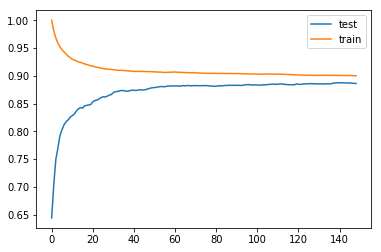

In [28]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()

# Прогноз на тестовой выборке

In [162]:
#выбираем модель
best_model = cbl_final

In [163]:
df_test = pd.read_csv('test.csv')
df_test.head(5)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [164]:
#делаем препроцессинг через функцию (функции пока нет)
ids = df_test['_id']
test_data_prepared = StandardScaler().fit_transform(preprocessing(df_test))

In [165]:
df_test['target']= best_model.predict(test_data_prepared)

In [166]:
df_test[['_id','target']].to_csv('submit.csv',index=False)